In [113]:
import os
import matplotlib.pyplot

# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [114]:
vimage, vlabel = tfds.as_numpy(tfds.load(
    'mnist',
    split='test',
    batch_size=-1,
    as_supervised=True,
))

print(type(vimage), vimage.shape)
print(vlabel)

<class 'numpy.ndarray'> (10000, 28, 28, 1)
[2 0 4 ... 8 0 5]


In [115]:
timage, tlabel = tfds.as_numpy(tfds.load(
    'mnist',
    split='train',
    batch_size=-1,
    as_supervised=True,
))

print(type(timage), timage.shape)

<class 'numpy.ndarray'> (60000, 28, 28, 1)


In [116]:
timage = timage.reshape(timage.shape[0],28,28,1)
vimage = vimage.reshape(vimage.shape[0],28,28,1)

In [117]:
timage = timage.astype('float32')
vimage = vimage.astype('float32')

timage/=255.
vimage/=255

In [118]:
tlabel = tf.keras.utils.to_categorical(tlabel,num_classes=10)
vlabel = tf.keras.utils.to_categorical(vlabel,num_classes=10)

print(tlabel.shape)
print(tlabel[0])

(60000, 10)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [119]:
model=tf.keras.models.Sequential([

        
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
# #     
    
#         tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
#         tf.keras.layers.MaxPooling2D(2,2),
        

    
        tf.keras.layers.Flatten(),
      
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(10,activation='softmax')
    
        
    
    
    
])


In [120]:
lr=1e-4
ep=15

opt=tf.keras.optimizers.Adam(learning_rate=lr)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [121]:
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [122]:
training_data=ImageDataGenerator(
  
    rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08
#     validation_split=0.25
    )

val_data=ImageDataGenerator()


In [123]:
training_data.fit(timage)
val_data.fit(vimage)

In [124]:
train=training_data.flow(timage,tlabel,batch_size=64)
val=val_data.flow(vimage,vlabel,batch_size=64)

In [125]:
history=model.fit(train,
                  epochs=10,
                  
                  steps_per_epoch=len(timage) //  64 ,
                  validation_data=val,
                  validation_steps=10000//64,
                  verbose=1
                 )

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 937 steps, validate for 156 steps
Epoch 1/10
937/937 [==============================] - 22s 23ms/step - loss: 0.3883 - accuracy: 0.8750 - val_loss: 0.0822 - val_accuracy: 0.9741
Epoch 2/10
937/937 [==============================] - 21s 22ms/step - loss: 0.1462 - accuracy: 0.9548 - val_loss: 0.0573 - val_accuracy: 0.9812
Epoch 3/10
937/937 [==============================] - 20s 21ms/step - loss: 0.1104 - accuracy: 0.9653 - val_loss: 0.0615 - val_accuracy: 0.9793
Epoch 4/10
937/937 [==============================] - 20s 21ms/step - loss: 0.0921 - accuracy: 0.9711 - val_loss: 0.0432 - val_accuracy: 0.9870
Epoch 5/10
937/937 [==============================] - 20s 21ms/step - loss: 0.0798 - accuracy: 0.9745 - val_loss: 0.0526 - val_accuracy: 0.9841
Epoch 6/10
937/937 [==============================] - 20s 22ms/step - loss: 0.0744 - accuracy: 0.9771 - val_loss: 0.0433 - val_accuracy: 0.9859
Epoch 7/10
937/937 [==============================] - 20s 21ms/step - loss: 0.0677 - accurac

In [126]:
len(timage) //64,

(937,)

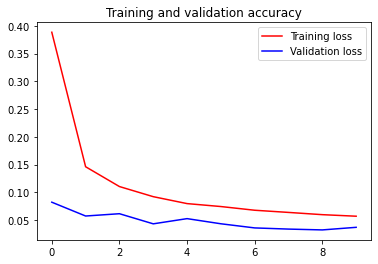

<Figure size 432x288 with 0 Axes>

In [132]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mapimg


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [128]:
model.save("mnist_imdagen.model",save_format='h5')

In [129]:
import numpy as np 
image_ind = np.random.randint(0, vimage.shape[0])
pred = model.predict(vimage[image_ind].reshape(1, 28, 28, 1)).tolist()[0]

In [130]:
print(vlabel[image_ind])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [131]:
print(pred)

[5.325362373298503e-10, 3.006528137561304e-09, 0.9999967813491821, 1.3090926813674741e-06, 1.4484044389209694e-12, 1.7697692270002285e-11, 7.418809566672735e-09, 2.693462022307358e-07, 1.6714258208594401e-06, 5.955015647263195e-11]
